### Description
This Notebook shows how to train and use the library for music genre classification.

### Download data
For this part you will need to have kaggle installed. `pip install kaggle`.
Alternativaly you could download the dataset from `https://www.kaggle.com/datasets/sripaadsrinivasan/audio-mnist` and manually extract it into `data/audio-mnist`

In [1]:
import os
import subprocess

dataset_path = "data/audio-mnist"

if not os.path.exists(dataset_path):
    print("Dataset not found. Downloading...")
    os.makedirs(dataset_path, exist_ok=True)
    subprocess.run(["kaggle", "datasets", "download", "-d", "sripaadsrinivasan/audio-mnist", "-p", dataset_path, "--unzip"])
    print("Download complete.")
else:
    print("Dataset already exists.")

Dataset already exists.


### Data format
We first have to create a dataframe which stores all the data (file paths and labels)

In [2]:
import pandas as pd

In [3]:
numbers_path = os.path.join(dataset_path, "data")
paths = []
labels = []
for speaker in os.listdir(numbers_path):
    folder_path = os.path.join(numbers_path, speaker)
    if not os.path.isdir(folder_path):
        continue
    for filename in os.listdir(folder_path):
        if not filename.endswith(".wav"):
            continue
        paths.append(os.path.join(folder_path, filename))
        labels.append(filename[0])
df = pd.DataFrame({"file_path": paths, "label": labels})
df = df[df["file_path"] != "data/gtzan-dataset-music-genre-classification\Data/genres_original\jazz\jazz.00054.wav"] # remove corrupted file
df.sample(5)

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kdens\AppData\Local\Temp\ipykernel_23456\1337877002.py:14: SyntaxWarning: invalid escape sequence '\D'
  df = df[df["file_path"] != "data/gtzan-dataset-music-genre-classification\Data/genres_original\jazz\jazz.00054.wav"] # remove corrupted file


,file_path,label
26838,data/audio-mnist\data\54\6_54_43.wav,6
24803,data/audio-mnist\data\50\6_50_11.wav,6
16804,data/audio-mnist\data\34\6_34_12.wav,6
18973,data/audio-mnist\data\38\9_38_3.wav,9
22620,data/audio-mnist\data\46\2_46_27.wav,2


### Model training

In [4]:
from auto_audio.auto_audio_model import AutoAudioModel
from sklearn.model_selection import train_test_split
df = df.sample(n=1000, random_state=42)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
model = AutoAudioModel()
model.fit(df_train, time_limit=600)

c:\Projects\AutoAudio\test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Preprocessing audio files.
Finished preprocessing files.
Cuda not available. Not training transformer model.
Training SVM
SVM achieved 56.875% accuracy.
Training KNN
KNN achieved 65.625% accuracy.
Training Gradient Boosting
Gradient Boosting achieved 90.625% accuracy.
Finished training.
Best model is: Gradient Boosting


Model Accuracy: 0.82


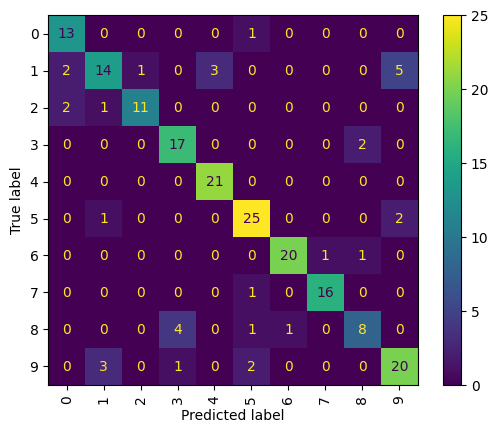

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

y_test = df_test["label"]
y_pred = model.predict(df_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.xticks(rotation=90)
plt.show()